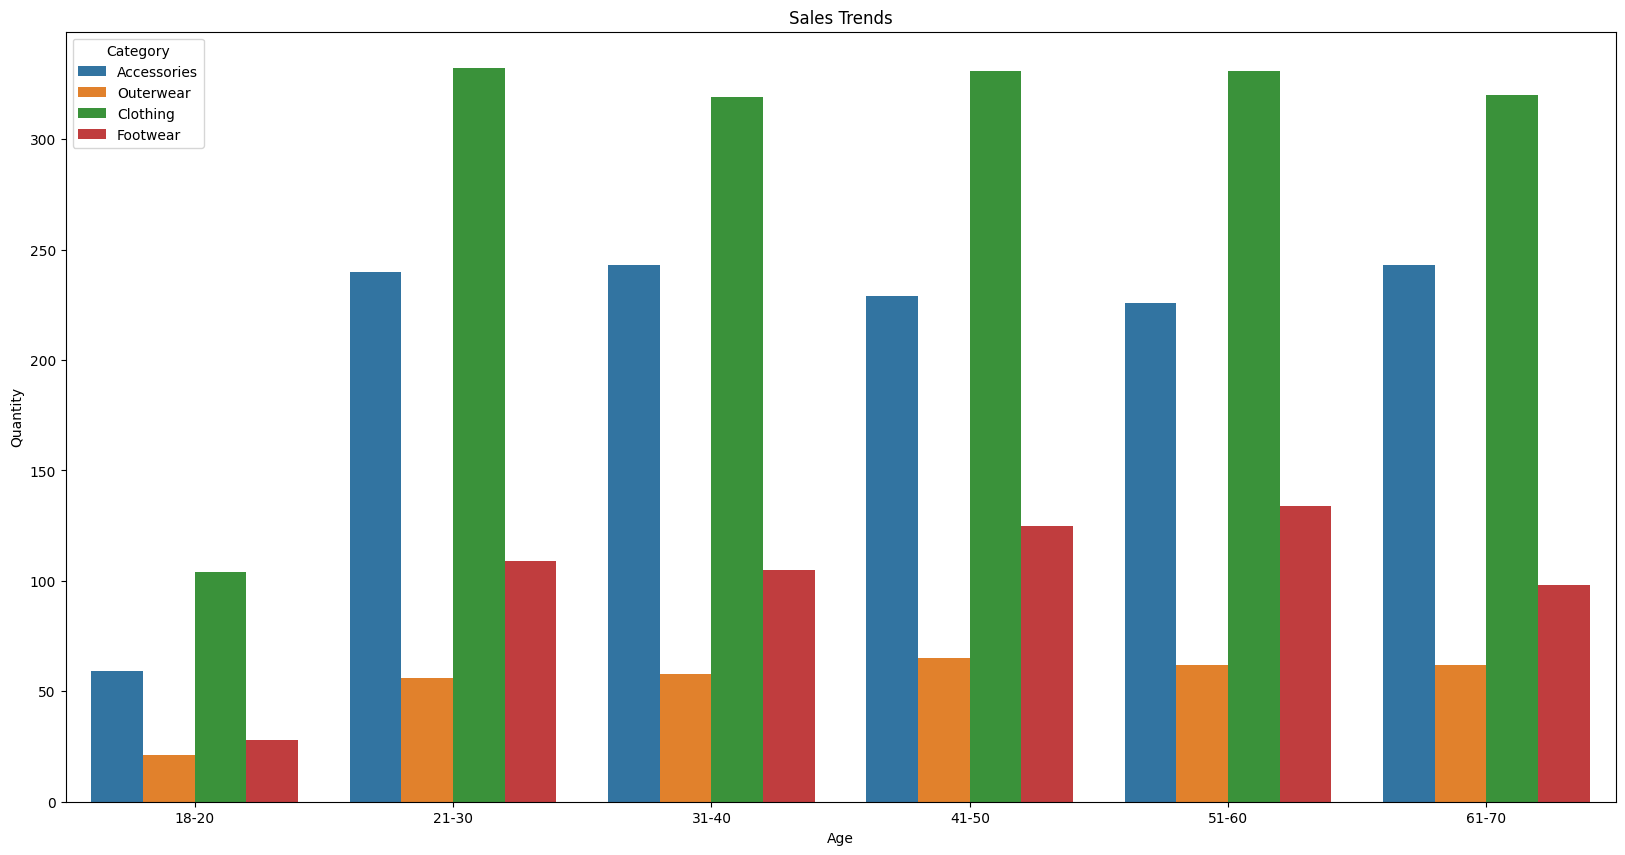

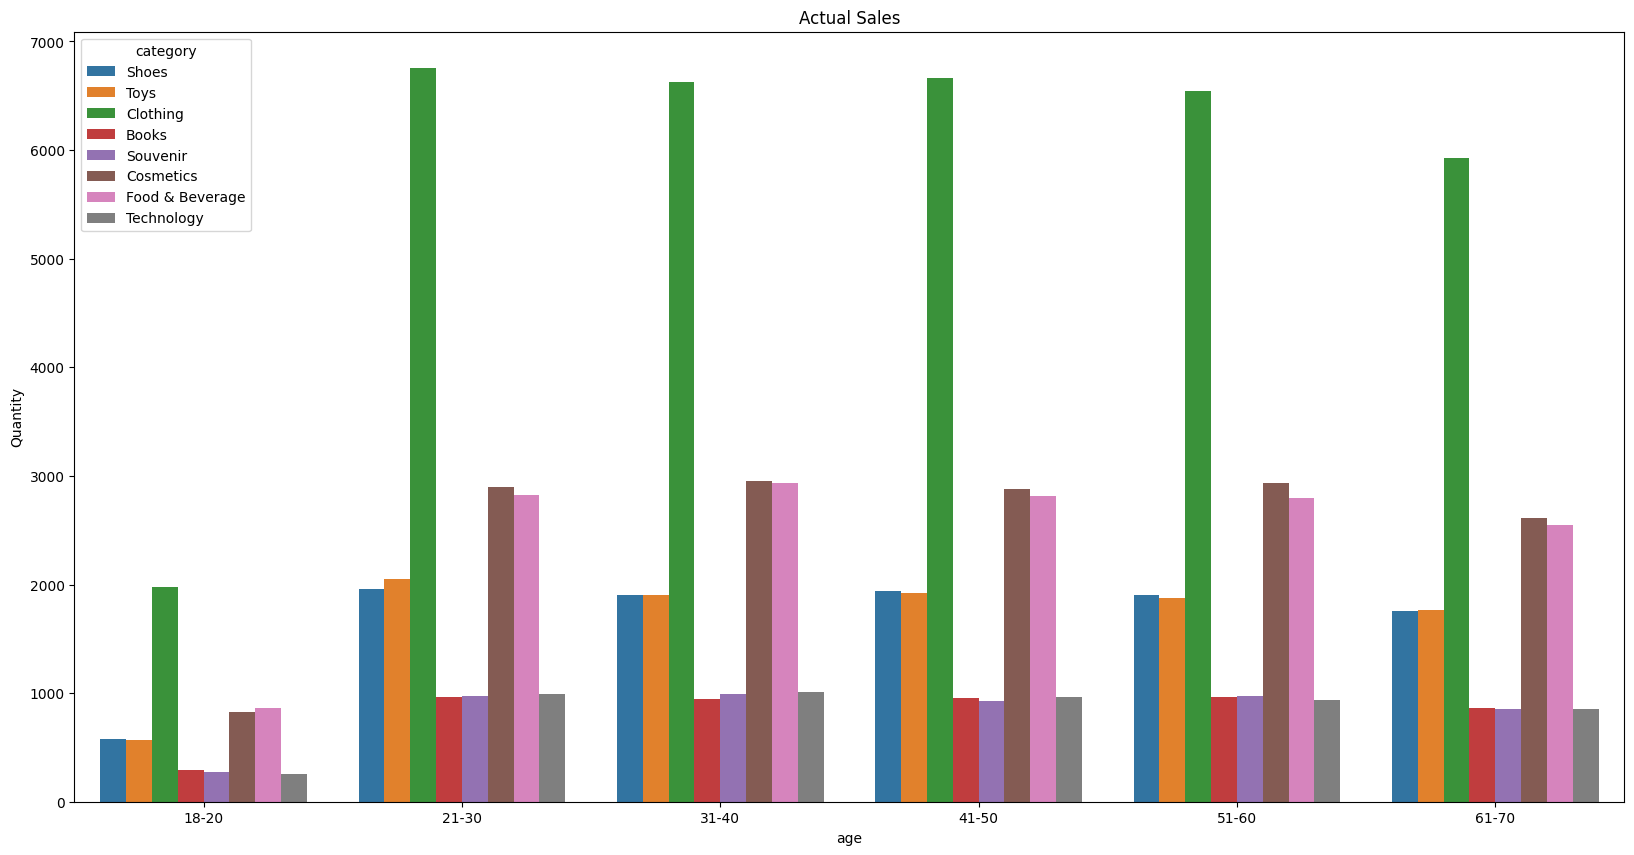

In [28]:
#importing necessary libraries
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#reading the datasets
data1= p.read_csv("shopping_trends_updated.csv")
data2=p.read_csv("customer_shopping_data (1).csv")

#assigning rank to Frequency of Purchases
x=data1["Frequency of Purchases"]
def convert(x):
  if x=='Annually': return 1
  elif x=='Quarterly': return 2
  elif x=='Every 3 Months': return 3
  elif x=='Monthly': return 4
  elif x=='Fortnightly': return 5
  elif x=='Weekly': return 6
  elif x=='Bi=Weekly': return 7

data1['Frequency of Purchases']=data1['Frequency of Purchases'].apply(convert)

#Grouping age into classes
y=data1["Age"]
z=data2["age"]
def cohort(x):
    if x<21:
        return '18-20'
    elif x<31:
        return '21-30'
    elif x<41:
        return '31-40'
    elif x<51:
        return '41-50'
    elif x<61:
        return '51-60'
    elif x<71:
        return '61-70'
d1_sort_age = data1.sort_values('Age')
d1_sort_age['Age'] = d1_sort_age['Age'].apply(cohort)

d2_sort_age = data2.sort_values('age')
d2_sort_age['age'] = d2_sort_age['age'].apply(cohort)

cols=['Category']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    ax=plt.subplot(1,len(cols),i+1)
    sns.countplot(x="Age",hue=str(col),data=d1_sort_age)
    ax.set_title("Sales Trends")
    ax.set_ylabel('Quantity')

cols1=['category']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols1):
    ax=plt.subplot(1,len(cols),i+1)
    sns.countplot(x="age",hue=str(col),data=d2_sort_age)
    ax.set_title("Actual Sales")
    ax.set_ylabel('Quantity')

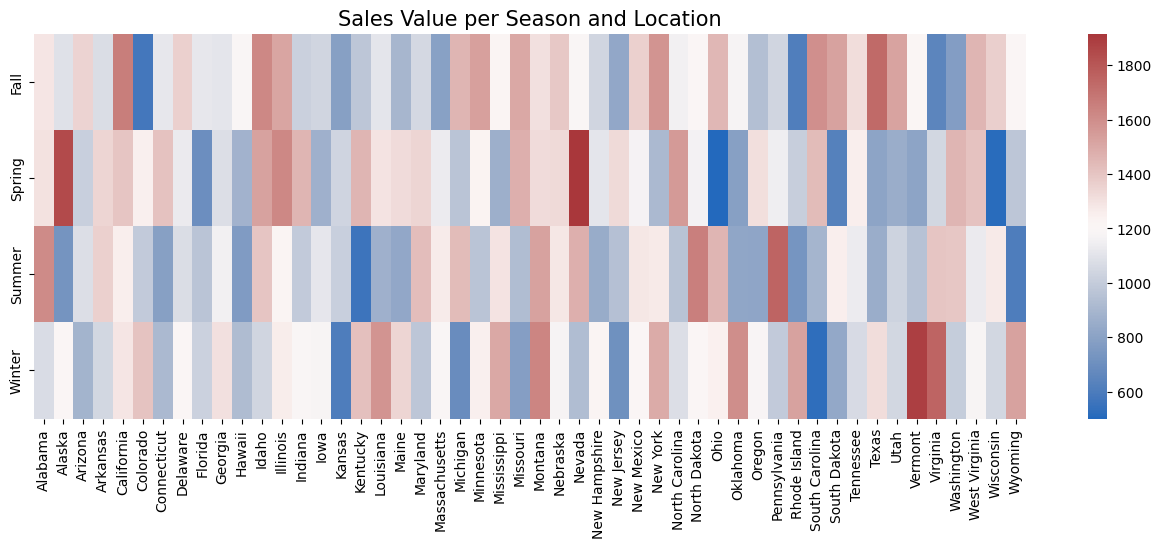

In [3]:
HM_Data = data1.pivot_table(index = 'Season',columns = 'Location', values = 'Purchase Amount (USD)', aggfunc='sum')
plt.figure(figsize = (16,5))
sns.heatmap(HM_Data, cmap = 'vlag').set(xlabel='', ylabel='')
plt.title('Sales Value per Season and Location', fontsize = 15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

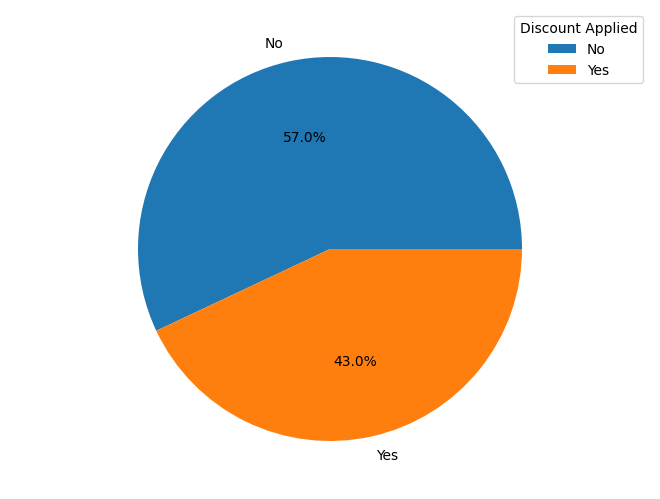

In [16]:
#discount applied or not?
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
a = data1.groupby('Discount Applied').Gender.count()
ax.pie(a, labels=a.keys(), autopct='%1.1f%%')
ax.legend(title = "Discount Applied")
plt.show

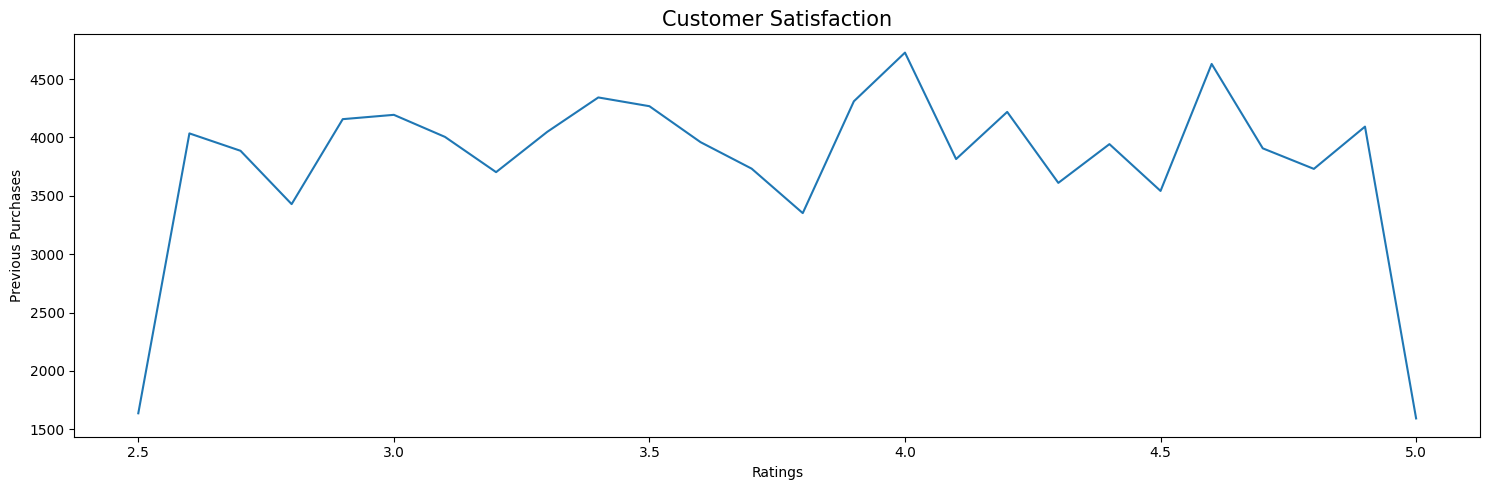

In [31]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Review and Ratings
data1.groupby('Review Rating')['Previous Purchases'].sum().plot(kind='line', ax=ax1)
ax1.set_title("Customer Satisfaction", fontsize=15)
ax1.set_xlabel("Ratings")
ax1.set_ylabel("Previous Purchases")

plt.tight_layout() 
plt.show()

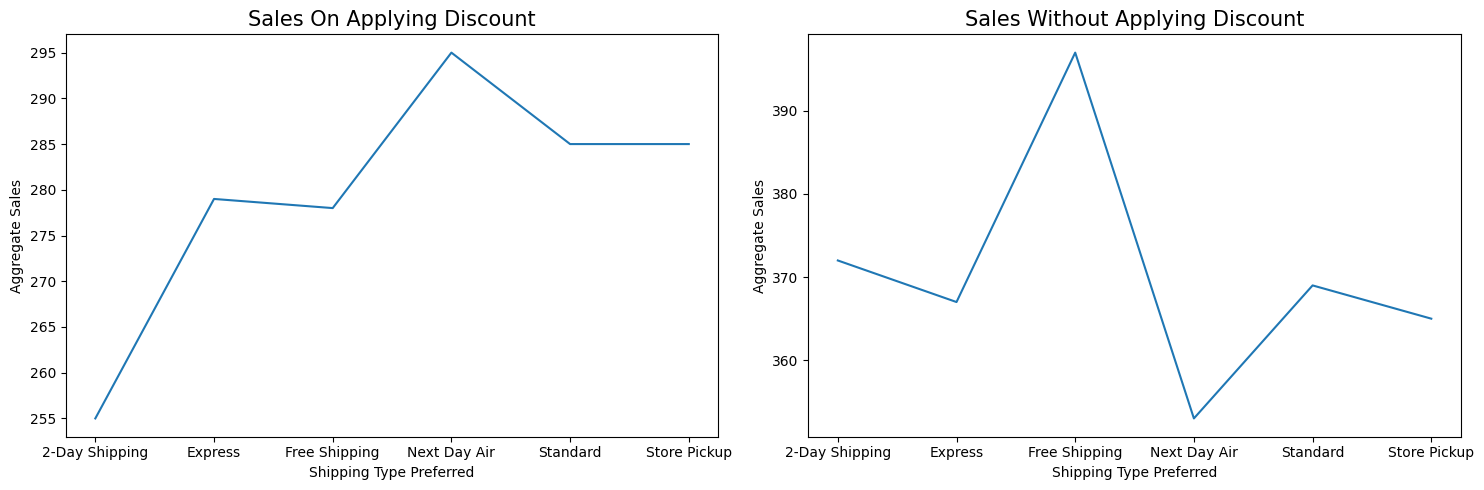

In [4]:
discount_data = data1[data1['Discount Applied'] == 'Yes']
no_discount_data = data1[data1['Discount Applied'] == 'No']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting sales with discount
discount_data.groupby('Shipping Type')['Category'].count().plot(kind='line', ax=ax1)
ax1.set_title("Sales On Applying Discount", fontsize=15)
ax1.set_xlabel("Shipping Type Preferred")
ax1.set_ylabel("Aggregate Sales")

# Plotting sales without discount
no_discount_data.groupby('Shipping Type')['Category'].count().plot(kind='line', ax=ax2)
ax2.set_title("Sales Without Applying Discount", fontsize=15)
ax2.set_xlabel("Shipping Type Preferred")
ax2.set_ylabel("Aggregate Sales")

plt.tight_layout() 
plt.show()


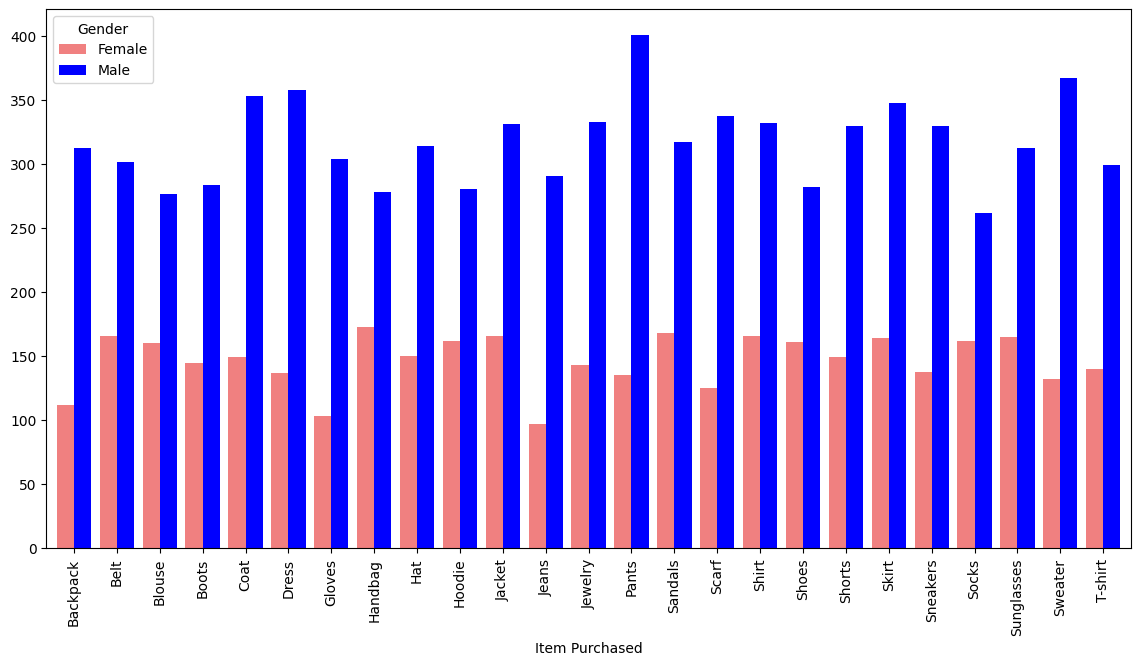

In [5]:
# Plotly Bar Chart
fig = px.bar(data1, x='Item Purchased', y='Purchase Amount (USD)', color='Gender',
             title='Popularity of Products By Revenue', barmode='stack')

# Update layout of Plotly chart
fig.update_layout(
    xaxis_title='Products Bought',  # X-axis title
    yaxis_title='Total Revenue',  # Y-axis title
    plot_bgcolor='white',  # White background color
)

fig.show()   #Show Plotly chart


# Grouped data for Matplotlib chart
grouped_data = data1.groupby(['Item Purchased', 'Gender'])['Frequency of Purchases'].sum().unstack()
colours = ['lightcoral', 'blue']

# Plot grouped bar chart using Matplotlib
grouped_data.plot(kind='bar', figsize=(14, 7), color=colours, width=0.8)

# Show Matplotlib chart
plt.show()


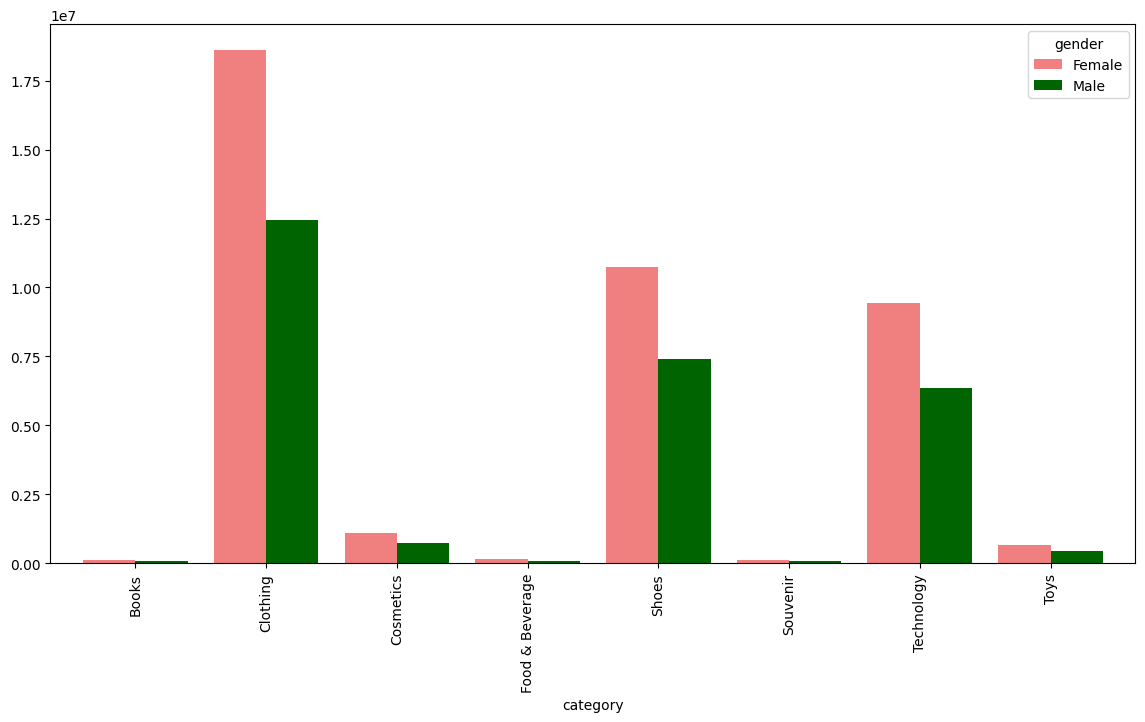

In [26]:
grouped = data2.groupby(['category', 'gender'])['price'].sum().unstack()
colours = ['lightcoral', 'darkgreen']

# Plot grouped bar chart using Matplotlib
grouped.plot(kind='bar', figsize=(14, 7), color=colours, width=0.8)

# Show Matplotlib chart
plt.show()

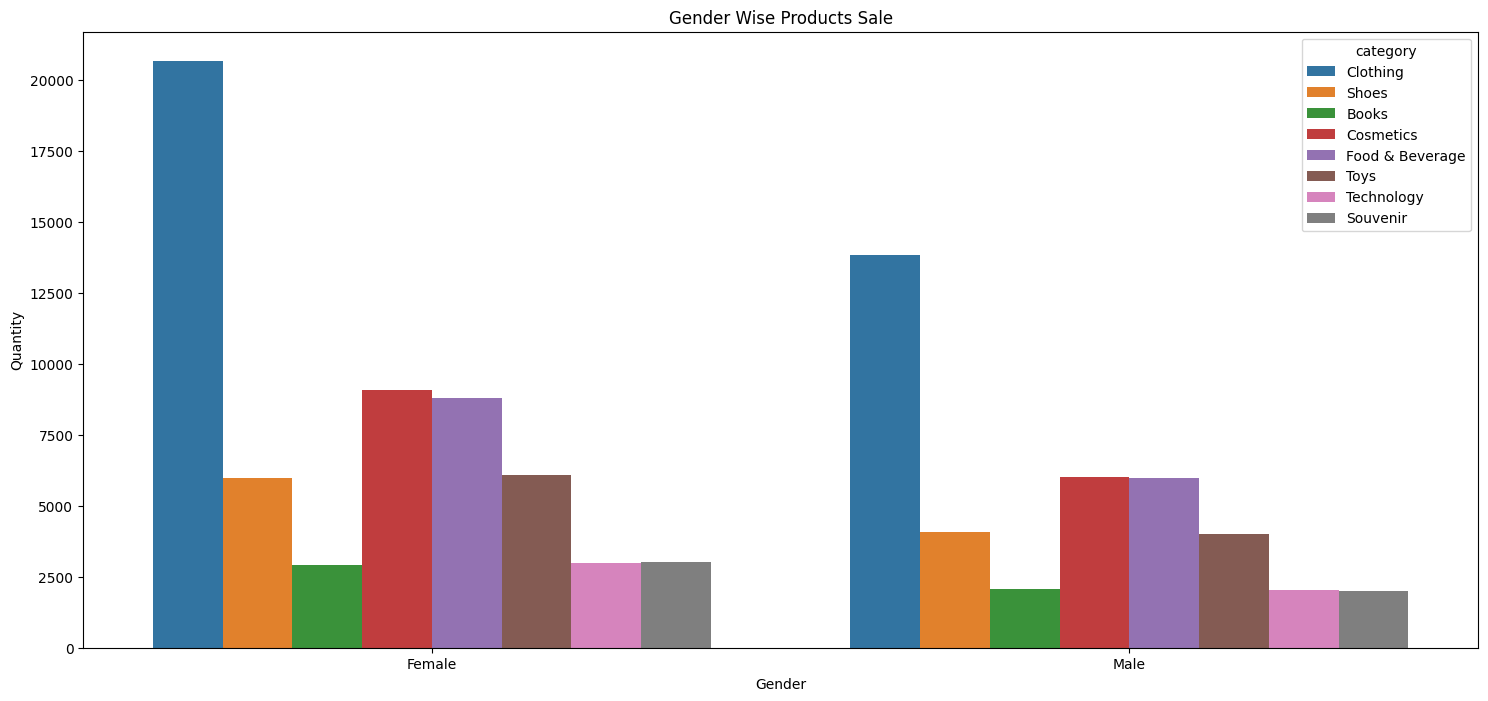

In [27]:
#gender wise shopping data
cols=['category']
fig = plt.figure(figsize=(18,8))
for i, col in enumerate(cols):
    ax=plt.subplot(1,len(cols),i+1)
    sns.countplot(x="gender",hue=str(col),data=data2)
    ax.set_title("Gender Wise Products Sale")
    ax.set_ylabel('Quantity')
    ax.set_xlabel('Gender')

<function matplotlib.pyplot.show(close=None, block=None)>

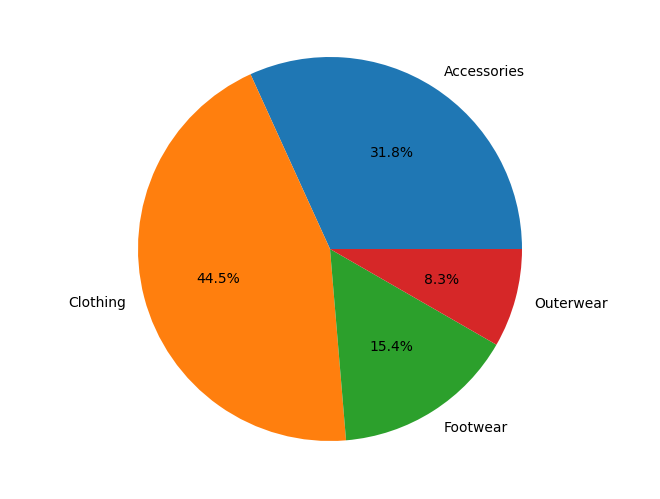

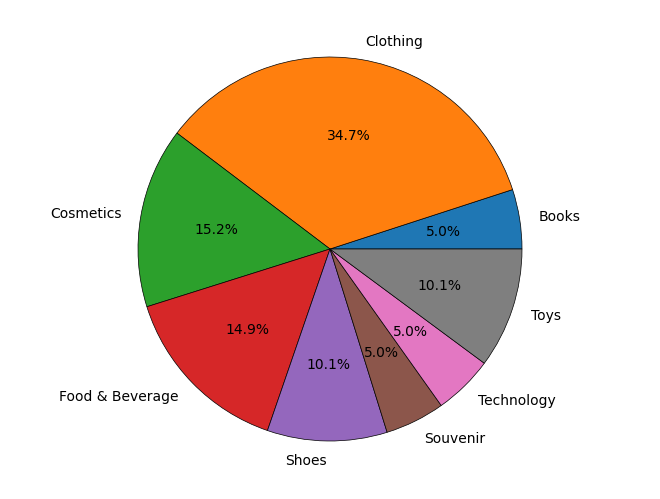

In [20]:
#shopping trends for different categories
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
a = data1.groupby('Category').Gender.count()
b = data1.Gender.unique()
ax.pie(a, labels=a.keys(), autopct='%1.1f%%')
plt.show

#actual data for different categories
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
ax.axis('equal')
a = data2.groupby('category').gender.count()
ax.pie(a, 
       labels=a.keys(), 
       autopct='%1.1f%%', 
       wedgeprops = {"edgecolor" : "black", 'linewidth': .5, 'antialiased': True}) 
plt.show